# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
chris,Ladies and gentlemen… live from the world-famo...,Chris Rock
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
deon,"[indistinct chattering] [woman] Oh, this water...",Deon Cole
fortune,[upbeat music plays] [audience cheering] [anno...,Fortune Feimster
gabriel,[man] Can you please state your name? Martin M...,Gabriel Iglesias
iliza,[upbeat music playing] [crowd cheering] Clevel...,Iliza Shlesinger
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies


In [23]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# !pip install textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
chris,Ladies and gentlemen… live from the world-famo...,Chris Rock,-0.058197,0.533453
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.004069,0.513958
deon,"[indistinct chattering] [woman] Oh, this water...",Deon Cole,-0.007042,0.534578
fortune,[upbeat music plays] [audience cheering] [anno...,Fortune Feimster,0.131908,0.491932
gabriel,[man] Can you please state your name? Martin M...,Gabriel Iglesias,0.112966,0.475079
iliza,[upbeat music playing] [crowd cheering] Clevel...,Iliza Shlesinger,0.099748,0.505675
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382


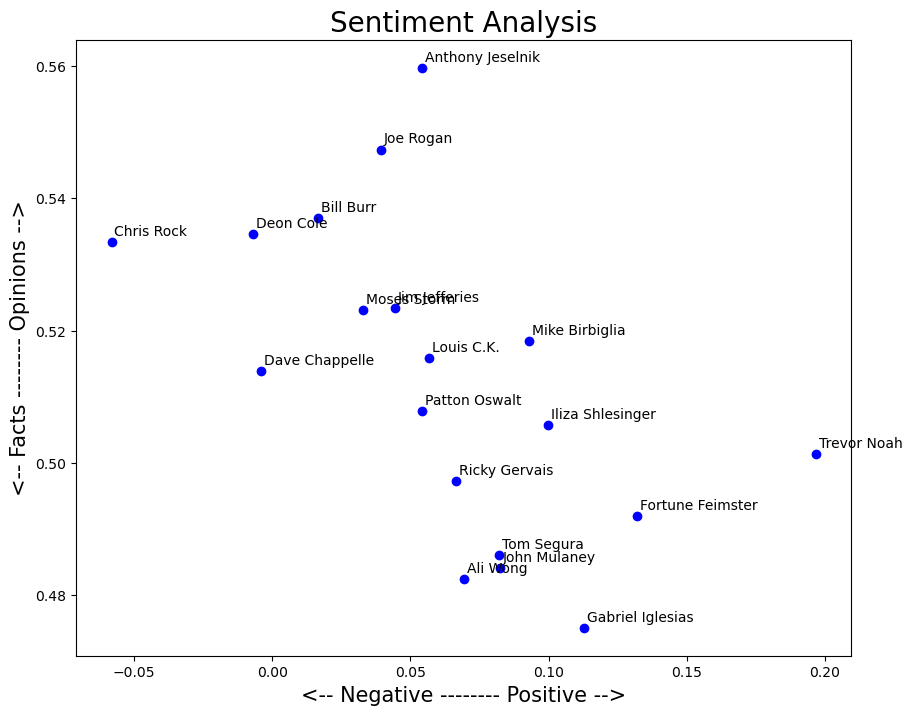

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
chris,Ladies and gentlemen… live from the world-famo...,Chris Rock,-0.058197,0.533453
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.004069,0.513958
deon,"[indistinct chattering] [woman] Oh, this water...",Deon Cole,-0.007042,0.534578
fortune,[upbeat music plays] [audience cheering] [anno...,Fortune Feimster,0.131908,0.491932
gabriel,[man] Can you please state your name? Martin M...,Gabriel Iglesias,0.112966,0.475079
iliza,[upbeat music playing] [crowd cheering] Clevel...,Iliza Shlesinger,0.099748,0.505675
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382


In [6]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [7]:
# The list has 10 elements, one for each transcript
len(list_pieces)

19

In [8]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [9]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.13933883477633482,
  -0.06333451704545455,
  -0.056153799903799935,
  0.014602659245516405,
  0.16377334420812684,
  0.09091338259441709,
  0.09420031055900621,
  0.11566683919944787,
  -0.05070608684245053,
  0.058467487373737366],
 [-0.0326152022580594,
  0.006825656825656827,
  0.023452001215159095,
  0.01934081890331888,
  -0.026312183887941466,
  0.06207506613756614,
  0.030250682288725742,
  -0.020351594027441484,
  -0.01150485008818343,
  0.10757491470108295],
 [-0.1102756694964487,
  -0.030948203842940693,
  -0.008369408369408358,
  -0.04235149410774411,
  -0.08572337384837385,
  -0.24502558041763445,
  -0.009949290953755227,
  0.0009053172704488345,
  -0.04185881633798301,
  -0.006859277061913787],
 [-0.05093449586407334,
  -0.071014719808377

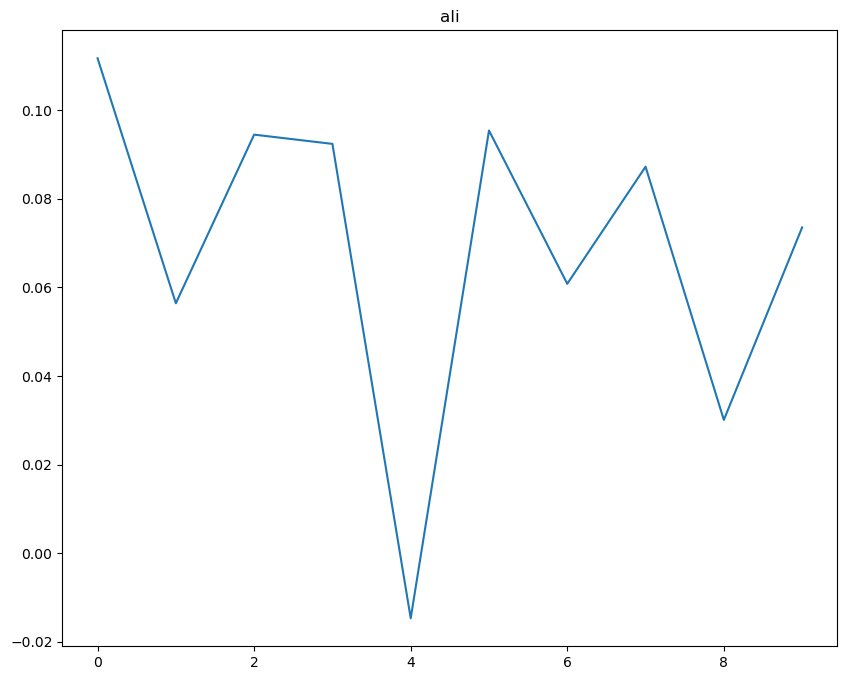

In [10]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

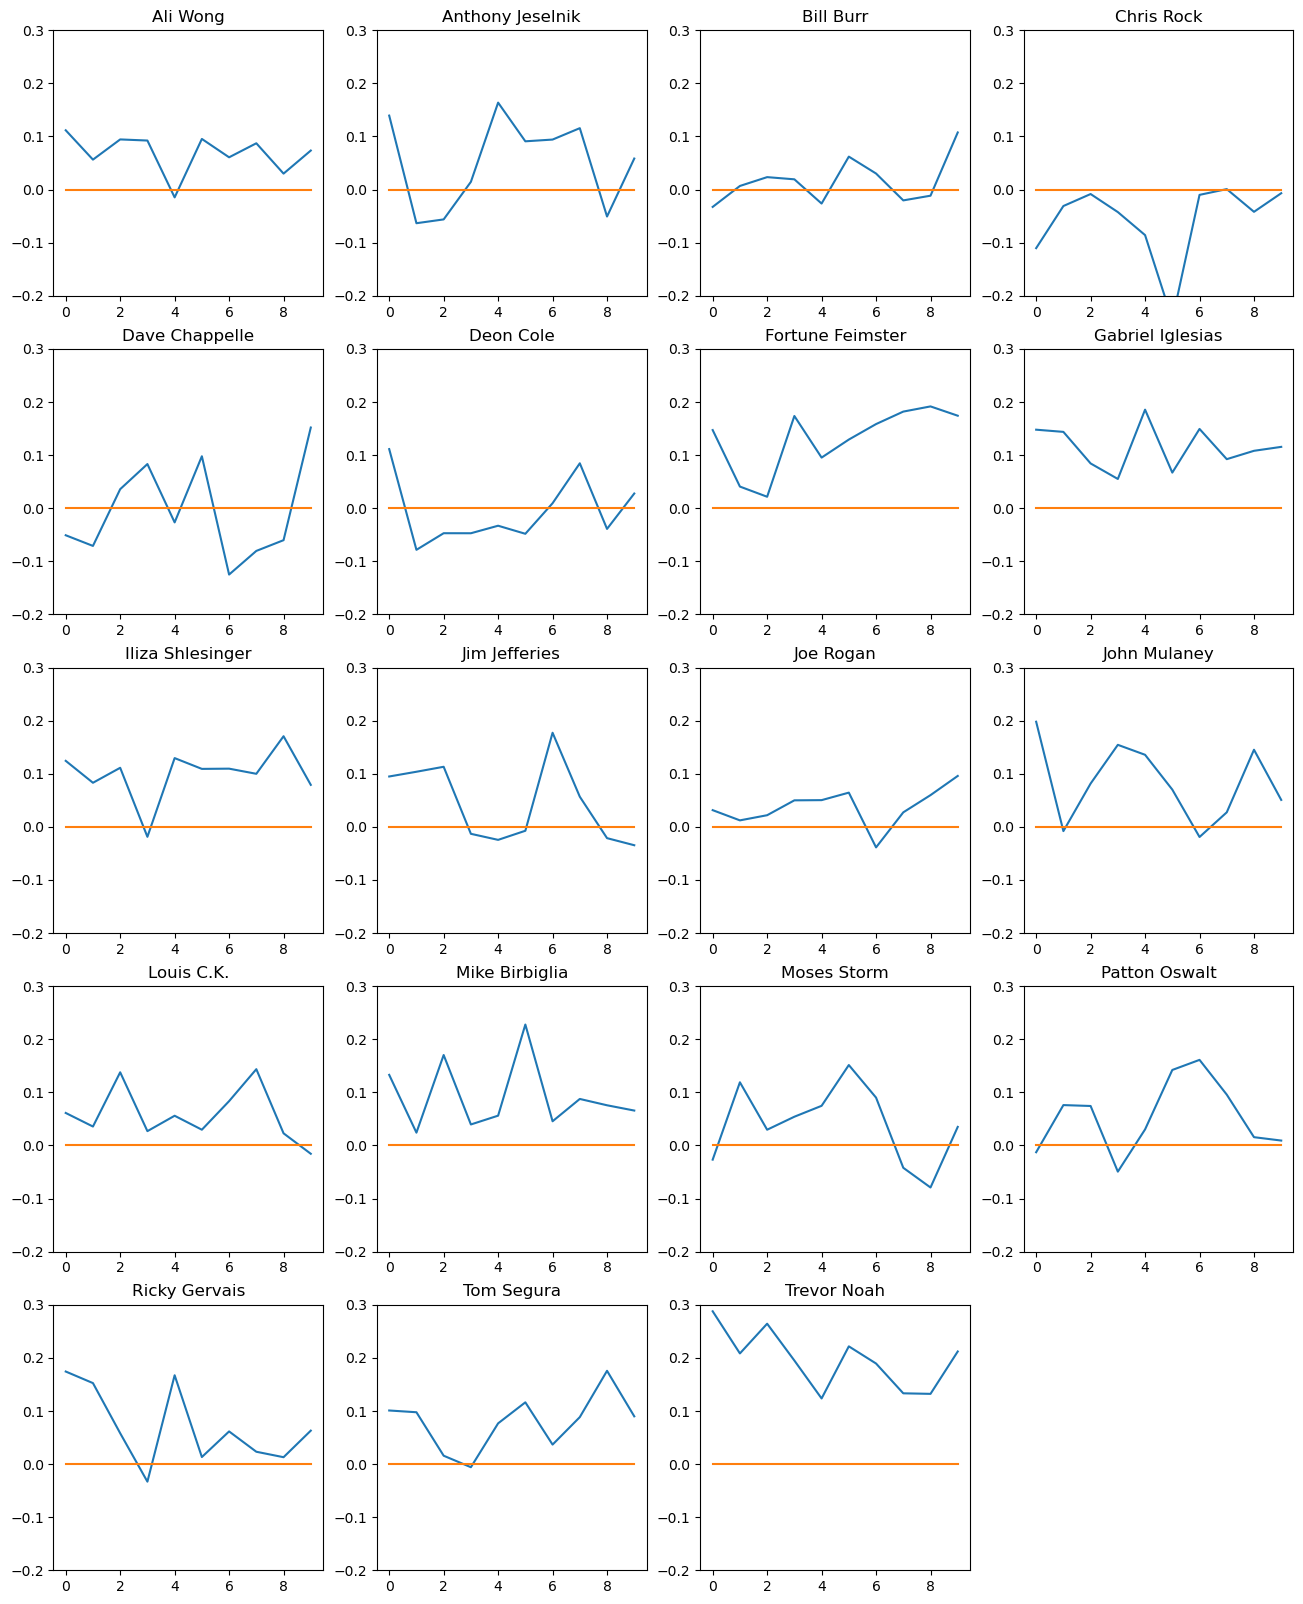

In [11]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 20]

for index, comedian in enumerate(data.index):    
    plt.subplot(5, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian according to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian according to Polarity and Subjectivity.


In [24]:
# Calculate mean polarity and subjectivity for each comedian
comedian_stats = data.groupby('full_name').agg({'polarity': 'mean', 'subjectivity': 'mean'})

# Classify comedians based on polarity
comedian_stats['polarity_class'] = pd.cut(comedian_stats['polarity'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

# Classify comedians based on subjectivity
comedian_stats['subjectivity_class'] = pd.cut(comedian_stats['subjectivity'], bins=[0, 0.3, 0.7, 1], labels=['low', 'medium', 'high'])

# Print the resulting DataFrame
print(comedian_stats)


                  polarity  subjectivity polarity_class subjectivity_class
full_name                                                                 
Ali Wong          0.069359      0.482403        neutral             medium
Anthony Jeselnik  0.054285      0.559732        neutral             medium
Bill Burr         0.016479      0.537016        neutral             medium
Chris Rock       -0.058197      0.533453        neutral             medium
Dave Chappelle   -0.004069      0.513958        neutral             medium
Deon Cole        -0.007042      0.534578        neutral             medium
Fortune Feimster  0.131908      0.491932       positive             medium
Gabriel Iglesias  0.112966      0.475079       positive             medium
Iliza Shlesinger  0.099748      0.505675        neutral             medium
Jim Jefferies     0.044224      0.523382        neutral             medium
Joe Rogan         0.039378      0.547370        neutral             medium
John Mulaney      0.08235

In [13]:
def Split_With_Time(split_time):
    list_pieces = []
    run_times = [62, 73, 63, 79, 59, 60, 79, 60, 63, 63, 76, 58, 58, 67, 62, 77, 80, 76, 77]
    splits=[math.ceil(x/split_time) for x in run_times]
    for i,t in enumerate(data.transcript):
        split = split_text(t,splits[i])
        list_pieces.append(split)

    mean_polarity=[]
    polarity_transcript = []
    for lp in list_pieces:
        polarity_piece = []
        for p in lp:
            polarity_piece.append(TextBlob(p).sentiment.polarity)
        polarity_transcript.append(polarity_piece)
        mean_polarity.append(sum(polarity_piece)/len(polarity_piece))

    mean_subjectivity=[]    
    subjectivity_transcript = []
    for lp in list_pieces:
        subjectivity_piece = []
        for p in lp:
            subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
        subjectivity_transcript.append(subjectivity_piece)
        mean_subjectivity.append(sum(subjectivity_piece)/len(subjectivity_piece))

    comedian_routines=data.groupby('full_name').agg({'polarity': 'mean', 'subjectivity': 'mean'})
    comedian_routines['polarity']=mean_polarity
    comedian_routines['subjectivity']=mean_subjectivity

    # Classify comedians based on polarity
    comedian_routines['polarity_class'] = pd.cut(comedian_routines['polarity'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

    # Classify comedians based on subjectivity
    comedian_routines['subjectivity_class'] = pd.cut(comedian_routines['subjectivity'], bins=[0, 0.3, 0.7, 1], labels=['low', 'medium', 'high'])

    # Print the resulting DataFrame
    return(comedian_routines,polarity_transcript,subjectivity_transcript,splits)

In [14]:
comedian_routines,polarity_transcript,subjectivity_transcript,splits = Split_With_Time(2)

## Polarity Plot

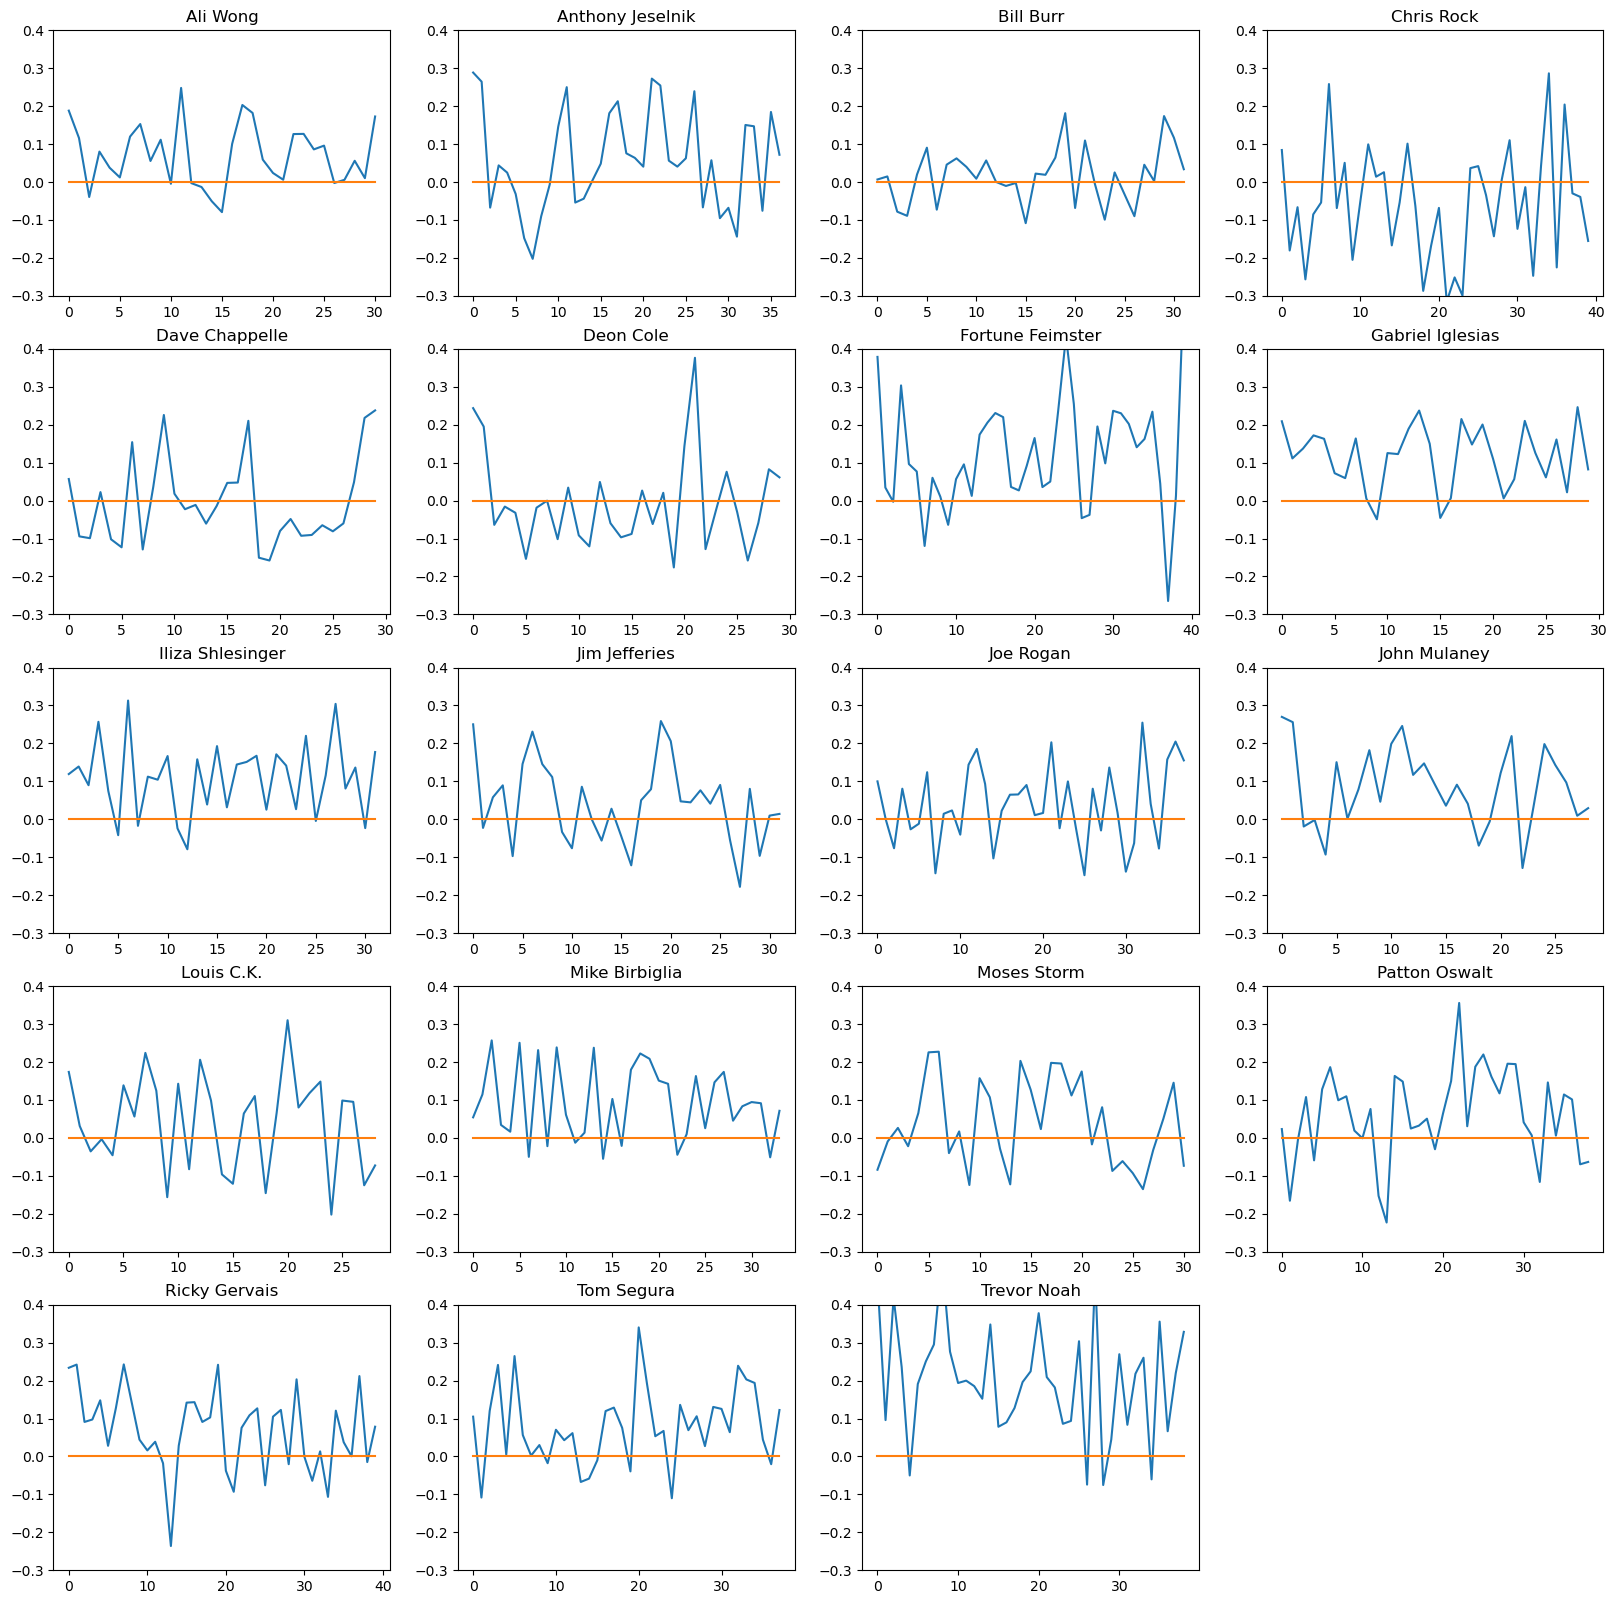

In [15]:
# Show the plot for all comedians for Polarity
plt.rcParams['figure.figsize'] = [20, 20]

for index, comedian in enumerate(data.index):    
    plt.subplot(5, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,splits[index]), np.zeros(splits[index]))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.3, ymax=.4)
plt.show()

* From the analysis, it can be inferred that <B> Ali Wong, Fortune Feimster, Gabriel Igleasis, Iliza Shlesinger, John Mulaney, Mike Birbiglia and Trevor Noah </B> consistently exhibit a positive tone in their comedic performances. 
* On the other hand, <B> Chris Rock and Deon Cole </B> frequently employ negative sentiments in their comedy.
* <B> Bill Burr, Louis C.K. and Joe Rogan's </B> polarity graph consistently hovers around the zero mark, indicating that his comedy style is neutral in nature.

## Subjectivity Plot

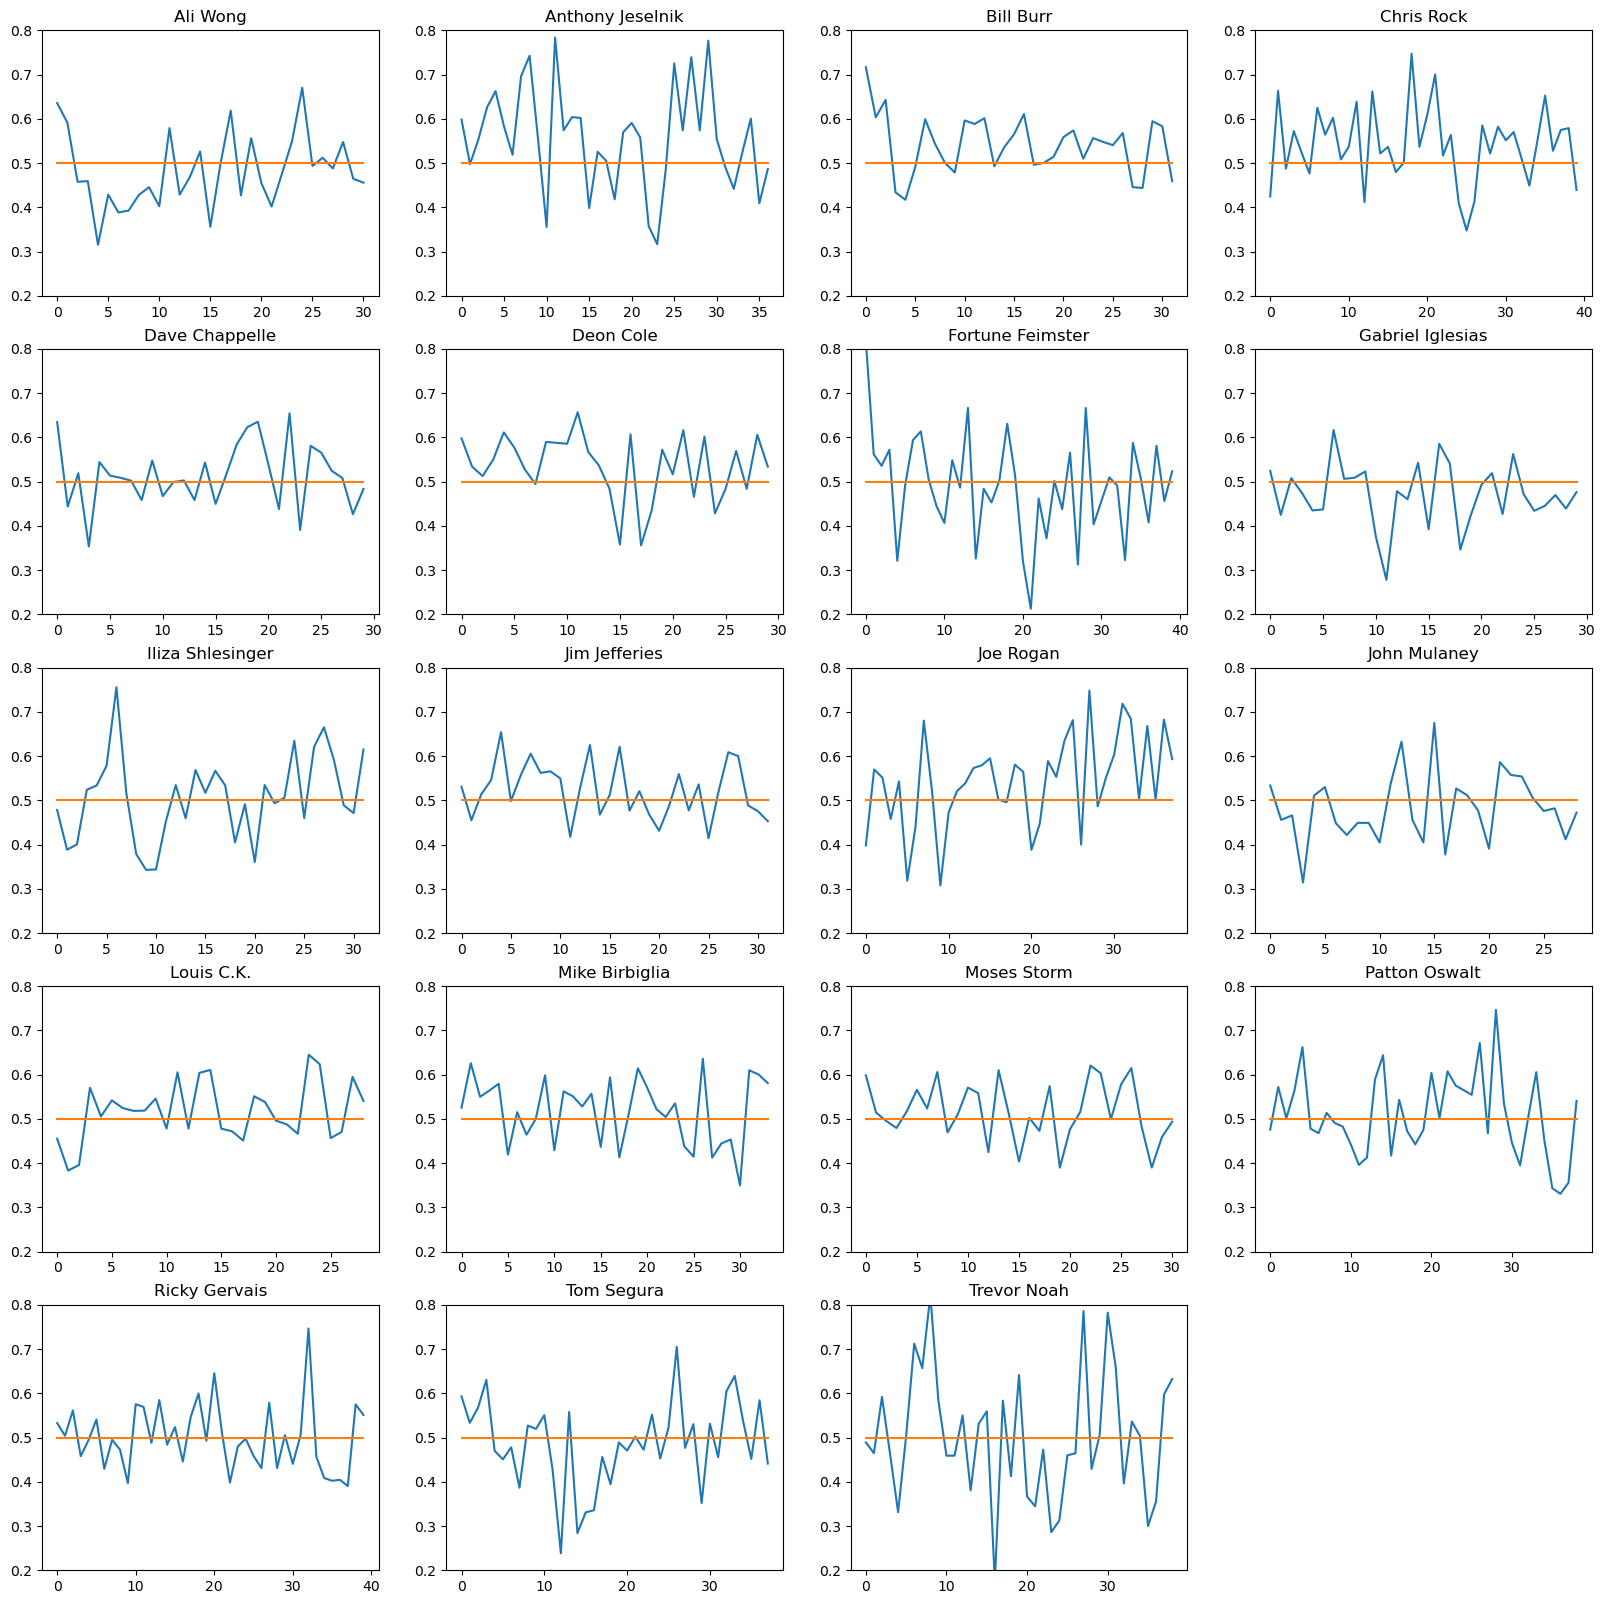

In [16]:
comedian_routines2,polarity_transcript,subjectivity_transcript,splits=Split_With_Time(2)
# Show the plot for all comedians for Subjectivity
plt.rcParams['figure.figsize'] = [20, 20]

for index, comedian in enumerate(data.index):    
    plt.subplot(5, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,splits[index]), np.zeros(splits[index])+0.5)
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0.2, ymax=0.8)
plt.show()

* <B> Dave Chappelle, Jim Jefferies, Mike Birbiglia, and Moses Storm's </B> subjectivity graph shows a neutral score near the average value, indicating that they do not strongly lean towards presenting factual information or personal opinions in their performances.
* <B> Anthony Jeselnik and Chris Rock </B> are recognized in the comedy world for expressing a considerable amount of their opinions.
* <B> Fortune Feimster and Trevor Noah </B> have a positive comedy style and their comedy routine is mainly centered on presenting factual information.

## Findings

* After conducting a more detailed analysis of the sentiment graphs for various comedians, it became evident that their comedic styles were not as straightforward as initially believed. While the initial observations indicated that comedians tended to stick to either positive or negative sentiment throughout their performances, the more granular graphs revealed a more intricate approach. 
* For instance, despite being perceived as a comedian with a negative tone, <B> Chris Rock's </B> comedy exhibited both positive and negative sentiment, with 13 peaks in the negative region and 10 peaks in the positive. 
* Similarly, the comedy of <B> Jim Jefferies, Joe Rogan, Louis C.K., Mike Birbiglia, Moses Storm, Ricky Gervais, Tom Segura and Trevor Noah </B> was found to incorporate negative sentiment in their otherwise positive sets, indicating a more nuanced approach to humor.